In [1]:
import numpy as np
import lmdb
import sys
caffe_root = '..'
sys.path.insert(0,caffe_root+'/python')
import caffe
import os
import cv2
from scipy import misc
from os.path import expanduser
home_dir = expanduser("~")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from pycocotools.coco import COCO
from PIL import Image

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()
itr = 22000
net = caffe.Net(caffe_root+'/models/coco-baseline/deploy.prototxt',caffe_root+'/models/coco-baseline/base_'+str(itr)+'.caffemodel',caffe.TEST)

In [4]:
dataDir=home_dir + '/data/coco'
with open(dataDir+'/test_img.lst','r') as f:
    test_img_lst = f.readlines() 
with open(dataDir+'/test_label.lst','r') as f:
    test_label_lst = f.readlines() 

In [124]:
idx = np.random.randint(500)
im = Image.open(test_img_lst[idx][:-1])
label = Image.open(test_label_lst[idx][:-1])
label = np.array(label, dtype=np.float32)
im = np.array(im, dtype=np.float32)
if im.ndim==2:
    im = np.expand_dims(im,axis=2)
    im = np.tile(im, (1,1,3))
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))
im = np.expand_dims(im,axis=0)
label = np.expand_dims(label,axis=0)
label = np.expand_dims(label,axis=0)
net.blobs['data'].reshape(*im.shape)
net.blobs['data'].data[...] = im
net.blobs['label'].reshape(*label.shape)
net.blobs['label'].data[...] = label
net.forward()
pred = np.argmax(np.squeeze(net.blobs['score'].data),axis = 0)

True labels are: [0 1 3 4 8]
Predicted labels are: [0 1 3 4 6]


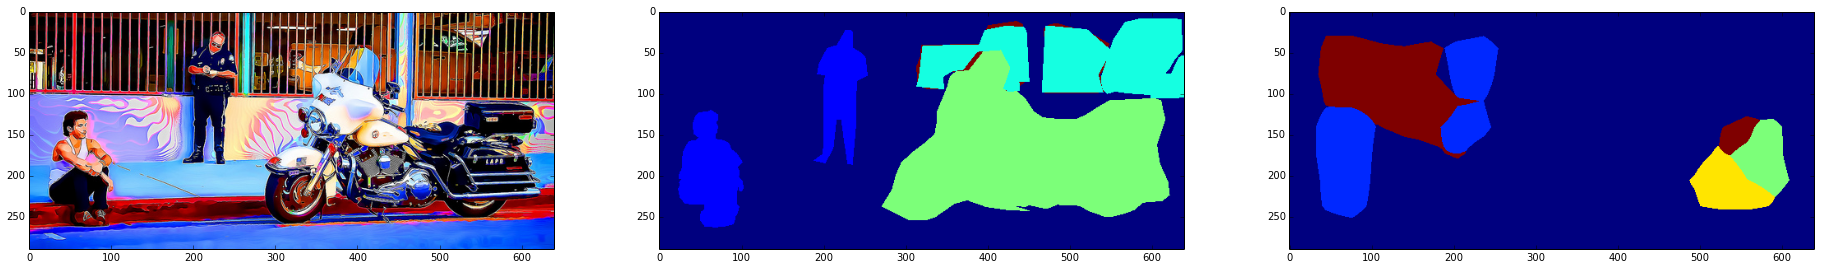

In [126]:
plt.figure(figsize=(16*2, 12*2))
print "True labels are: " + str(np.unique(label.astype(np.uint8)))
plt.subplot(131)
temp = (np.transpose(np.squeeze(im),(1,2,0))+np.array((104.00698793,116.66876762,122.67891434))).astype(np.uint8)
plt.imshow(temp[:,:,::-1])
plt.subplot(132)
plt.imshow(np.squeeze(label))
plt.subplot(133)
plt.imshow(pred)
print "Predicted labels are: " + str(np.unique(pred).astype(np.uint8))